# Simulated stellar dynamic spectra analysis

__5th Chinese SKA Summer School__<br>
__2019-08-15__<br>

In this tutorial, we will process and analyse simulated dynamic spectra from an active M-dwarf, UV Ceti, that resembles ASKAP observations of UV Ceti presented in <a href=https://arxiv.org/abs/1906.06570>a recent paper</a> by Zic et al. (2019).

Bursty emission from M-dwarfs at radio frequencies is often very highly polarised, occurs over timescales of milliseconds to hours, and can show large amounts of spectral structure as well. Dynamic spectra (showing amplitude as a function of time and frequency) is therefore an effective way to obtain detailed information about these bursts.

The dynamic spectra in this exercise are initially given for each instrumental polarisation ($XX$, $YY$, $XY$, and $YX$), and for each baseline of a 16-antenna array (giving $(16\times15)/2 = 120$ baselines).

Prior processing of the data presented here would have included calibration of the visibilities (including bandpass calibration, flux density scaling, complex gain & leakage calibration, and $XY$-phase calibration). The visibilities were inverted and deconvolved, using the deconvolution process to store a model of the field sources around the target star. The sky model constructed during deconvolution is then subtracted from the calibrated visibilities, leaving only the amplitude of the target star remaining in the residual visibilities. The target star was at the phase centre of the observations - if it weren't, then the visibilities would need to be phase-shifted to the location of the target star after calibration and imaging to produce these dynamic spectra.

In this tutorial, we will use `python` with `numpy`, `scipy`, and `matplotlib` to:
- [Load and inspect the data](#1.-Loading-and-inspecting-the-data)
- [Process the data to form dynamic spectra for the four Stokes parameters ($I$, $Q$, $U$, $V$)](#2.-Processing-the-data)
- [Analyse the features of the dynamic spectra](#3.-Analysis-of-dynamic-spectra)

There will be some qualitative and coding exercises throughout the tutorial. If you are having trouble, feel free to ask for help!

In [1]:
from __future__ import division
import numpy as np #load the numpy library, call it np
import matplotlib #load matplotlib and pyplot
import matplotlib.pyplot as plt

#set up plots to show in the notebook
%matplotlib inline 

#set the color styling to be nice
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']


try:
    matplotlib.rcParams['axes.prop_cycle'] = new_colors

except ValueError:
    matplotlib.rcParams['axes.color_cycle'] = new_colors

/usr/physics/python/Canopy-1.7.2/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## 1. Loading and inspecting the data

### Loading data:

The data for each instrumental polarisation and each baseline are stored in three-dimensional numpy arrays. The dimensions are time, observing frequency, and baseline number. Each cell in the arrays stores the amplitude of the calibrated and subtracted visibilities for each baseline, for each integration, and for each spectral channel.<br>
We will use the `np.load` function to load in the numpy arrays.

In [2]:
#time data, in hours
time = np.load('time.npy')

#frequency channel data, in MHz
freq = np.load('freq.npy')

#XX data
XX_baseline = np.load('XX_baselines.npy')

#YY data
YY_baseline = np.load('YY_baselines.npy')

#XY data
XY_baseline = np.load('XY_baselines.npy')

#YX data
YX_baseline = np.load('YX_baselines.npy')

### Inspecting the data

We can examine how many time samples and frequency channels we have for our dynamic spectra by finding the length of the time and frequency arrays:

In [3]:
n_time_samps = len(time) #number of time samples
n_chans = len(freq) #number of frequency channels

print('Number of time samples: {}'.format(n_time_samps))
print('Number of channels: {}'.format(n_chans))

Number of time samples: 1899
Number of channels: 72


#### Exercise 1.1
Determine the duration, time resolution, bandwidth, and spectral resolution of this data.

__Hint__ - `python` indexing begins from 0. This means to get the first element of the 1-D `time` array, use `time[0]`. The second element is `time[1]`, and so on. To get the last element, you can use `time[len(time) - 1]`, or more conveniently, `time[-1]`.

In [ ]:
#time resolution in hours:

time_res = #complete this line

#duration in hours:

duration = #complete this line

#frequency resolution in MHz:

freq_res = #complete this line

#frequency bandwidth in MHz:

bandwidth = #complete this line

print("""Time resolution: {:.6f} hours = {:.3f} seconds
Duration: {:.3f} hours
Frequency resolution: {:.3f} MHz
Bandwidth: {:.3f} MHz""".format(time_res, time_res*3600.0, duration, freq_res, bandwidth))

We inspect the data structure and properties below:

In [5]:
print('XX dynamic spectrum dimensions: {}'.format(XX_baseline.shape))

XX dynamic spectrum dimensions: (1899, 72, 120)


So there are 1899 time samples, 72 frequency channels, for 120 baselines. We can see that time forms the first axis of the dynamic spectrum array (index 0), frequency forms the second axis (index 1), and the baselines form the third axis of the array (index 2).

In the next line, we use the `dtype` attribute to see what type of data we are working with:

In [6]:
XX_baseline.dtype

dtype('complex128')

So we are working with complex-valued data. This makes sense - an interferometer measures the correlations of complex voltages.

As an example, let's plot the $XX$ data from one baseline.

When plotting the dynamic spectra, we transpose it using `np.transpose`, so that we have time on the $x$-axis and frequency on the $y$-axis.

Remember that the visibilities are complex-valued, so we can try plotting the real and imaginary parts separately. For this, we will use `np.real` and `np.imag`.

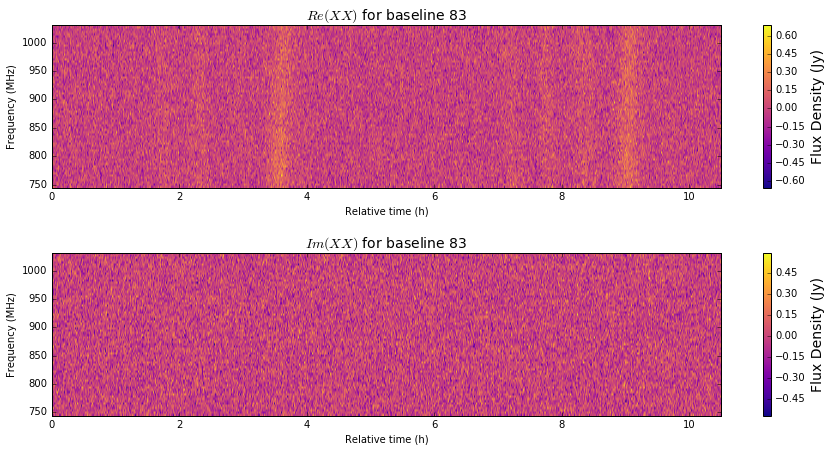

In [7]:
#first, initialise a figure with two subplots:
fig, (ax1, ax2) = plt.subplots(2, #two rows of axes
                               1, #one column of axes
                              figsize = (15, 7) # a nice big figure
                              )

#choose any baseline number:
baseline = 83

#get the XX dynamic spectrum for this baseline:
XX_test = XX_baseline[:, :, baseline] # The colon ":" selects all indices for that axis

#now we plot the real and imaginary parts using pyplot's imshow function
re = ax1.imshow(np.transpose(np.real(XX_test)),
          aspect = 'auto', #make the aspect ratio sensible
          origin = 'lower', #put the origin in the lower left corner
          extent = [time[0], time[-1], freq[0], freq[-1]], #set the axis values
          cmap = 'plasma' #Feel free to experiment with different colormaps e.g. viridis, magma, Blues
          )
#create a color-bar and set its label
fig.colorbar(re, ax = ax1).set_label('Flux Density (Jy)', fontsize = 14)


#set the axis labels
ax1.set_xlabel('Relative time (h)')
ax1.set_ylabel('Frequency (MHz)')
ax1.set_title(r'$Re(XX)$ for baseline {}'.format(baseline), fontsize = 14)

im = ax2.imshow(np.transpose(np.imag(XX_test)),
          aspect = 'auto', #make the aspect ratio sensible
          origin = 'lower', #put the origin in the lower left corner
          extent = [time[0], time[-1], freq[0], freq[-1]], #set the axis values
          cmap = 'plasma' #use an attractive colormap
          )
#create a color-bar and set its label
fig.colorbar(im, ax = ax2).set_label('Flux Density (Jy)', fontsize = 14)

#set the axis labels
ax2.set_xlabel('Relative time (h)')
ax2.set_ylabel('Frequency (MHz)')
ax2.set_title(r'$Im(XX)$ for baseline {}'.format(baseline), fontsize = 14)

fig.subplots_adjust(hspace = 0.4) #adjust subplots so that axis labels and titles don't overlap

So we can see that there appears to be some signal in the real part of $XX$ for this baseline, and the imaginary part appears to contain only noise.

#### Exercise 1.2

Copy and paste the code from above into the cell below. Change your code so that it plots the real and imaginary components of the $XY$ instrumental polarisation for one baseline. What do you notice about the real and imaginary components of the $XY$ visibilities compared with the $XX$ visibilities?

*Write any written solutions by double-clicking on this cell.*

You should have noticed that the real part of $XY$ appears to contain only noise, and the imaginary part of $XY$ appears to contain some signal. Why might this be? What does this tell us about the signal we are detecting?

## 2. Processing the data

So far, we have been working with the 120 individual baselines from our 16-element array. You might have noticed some strong indications of some emission in the dynamic spectra you plotted above, but ideally we want to make use of the full array in detecting structure in our dynamic spectra. To do this, we will average the dynamic spectra over all baselines, for each instrumental polarisation.

Fortunately this is straightforward with the use of `np.mean`, which allows you to take the average of any $N$-dimensional array over a specified axis. In our case, the baselines form the third axis of the array, so we will take the mean over axis index 2 (remember, `python` indices begin from 0).

#### Exercise 2.1

Use `np.mean` with the `axis = ` keyword to take the average dynamic spectrum over all baselines for each instrumental polarisation.

In [ ]:
XX = #complete this line
YY = #complete this line
XY = #complete this line
YX = #complete this line

Let's check if this has decreased the noise as expected, by plotting the real and complex parts of all four instrumental polarisations:

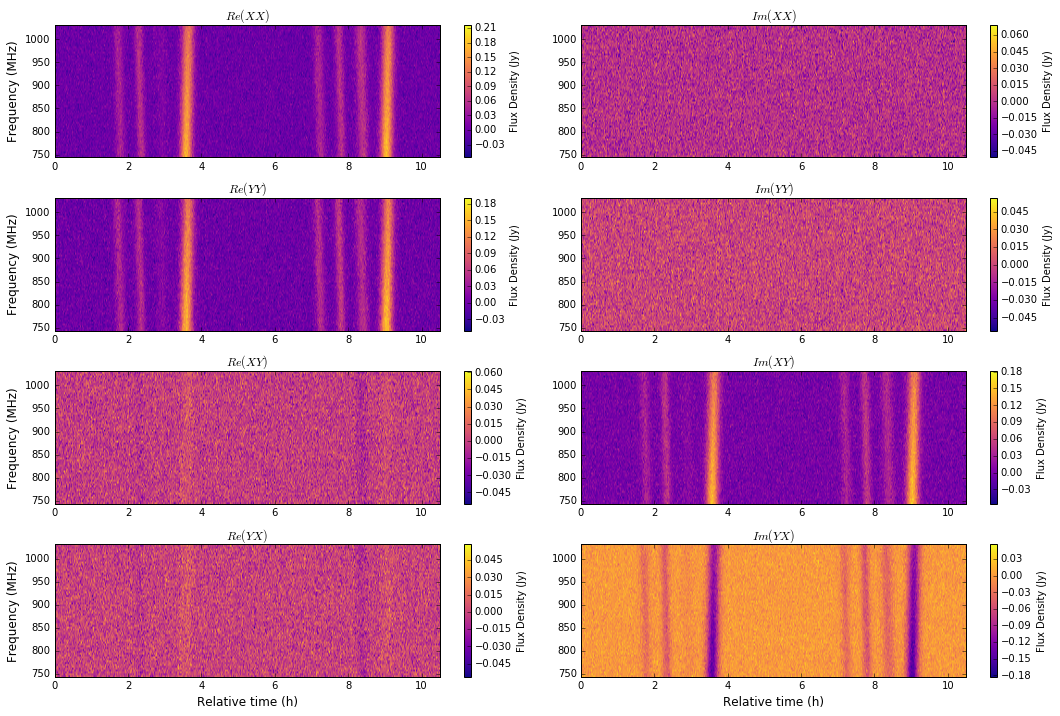

In [10]:
#a function to plot our dynamic spectra
def plot_ds(fig, ax, data, time = time, freq = freq):
    
    ds = ax.imshow(np.transpose(data),
                    aspect = 'auto', #make the aspect ratio sensible
                    origin = 'lower', #put the origin in the lower left corner
                    extent = [time[0], time[-1], freq[0], freq[-1]], #set the axis values
                    cmap = 'plasma' #use an attractive colormap. 
                  )
    #create a color-bar and set its label
    fig.colorbar(ds, ax = ax).set_label('Flux Density (Jy)', fontsize = 10)
    
    return ds

fig, axes = plt.subplots(4, #4 rows of axes
                               2, #2 columns of axes
                              figsize = (15, 10) # a nice big figure
                              )

#set up an array of labels for the axes
labels = np.array([ [r'$Re(XX)$', r'$Im(XX)$'], 
                    [r'$Re(YY)$', r'$Im(YY)$'], 
                    [r'$Re(XY)$', r'$Im(XY)$'], 
                    [r'$Re(YX)$', r'$Im(YX)$'] ]
                 )

for i, ipol in enumerate([XX, YY, XY, YX]):
    for j, part in enumerate([np.real(ipol), np.imag(ipol)]):
        ds = plot_ds(fig, axes[i, j], part, time = time, freq = freq)
        axes[i,j].set_title(labels[i,j], fontsize = 12) #set title
        

#set the axis labels where appropriate
for ax in axes[:, 0]:
    ax.set_ylabel('Frequency (MHz)', fontsize = 12)
for ax in axes[-1, :]:
    ax.set_xlabel('Relative time (h)', fontsize = 12)

fig.tight_layout()

Excellent! it looks like the noise hase gone down significantly, and we can now see emission in much more detail. We can check that the RMS noise decreased as expected by computing the standard deviation of a blank part of the dynamic spectra. You should check this for all four instrumental polarisations, but to save time for now we will just check the noise in the imaginary part of $XX$:

In [11]:
#RMS noise in one example baseline before averaging together:
rms_baseline = np.std(np.imag(XX_baseline[:, :, baseline]))
rms_avg = np.std(np.imag(XX))

print(rms_baseline)
print(rms_avg)

0.13936412325375994
0.012717246540105769


So the RMS has decreased from $\sim 140$ mJy to $\sim 13$ mJy.

#### Exercise 2.2
By what factor has the RMS noise decreased? What factor decrease would you expect after averaging together 120 baselines, assuming the noise in each baseline is independent?

In [ ]:
#calculate the factor the RMS noise has decreased by here:



Write any written notes/answers for this exercise below, by double clicking on this cell:





### Revision: measuring the Stokes parameters from instrumental polarisations

Recall that correlations of parallel and cross-hand voltage products (the "instrumental polarisations") give us a way to measure the true polarisation of emission from the sky in terms of the Stokes parameters.

For a standard linear-feed instrument, the instrumental polarisations are $XX$, $YY$, $XY$, and $YX$. These can be expressed in terms of the Stokes parameters as follows:<br>
$XX = I + Q$<br>
$YY = I - Q$<br>
$XY = U + jV$<br>
$YX = U - jV$,<br>
where $j$ is the imaginary unit, $\sqrt{-1}$.

These expressions can be rearranged to obtain the Stokes parameters in terms of the instrumental polarisations:<br>
$I = (XX + YY)/2$ — total (unpolarised) intensity;<br>
$Q = (XX - YY)/2$ — linear polarisation in vertical-horizontal basis;<br>
$U = (XY + YX)/2$ — linear polarisation in diagonal basis;<br>
$V = -j(XY - YX)/2$ — circular polarisation.<br>


#### Exercise 2.3

Using the expressions above, construct dynamic spectra for each of the four Stokes parameters.<br> __Hint__: You can use the expression `1j` as the imaginary unit in your code.

In [ ]:
I = #complete this line
Q = #complete this line
U = #complete this line
V = #complete this line

Excellent! Now that we have got our dynamic spectra for each Stokes parameter, we can plot them below.

## 3. Analysis of dynamic spectra

#### Exercise 3.1
Using the `plot_ds` function from above, construct a figure showing dynamic spectra for the __real part__ (*hint*: use `np.real`) of the four Stokes parameters $I$, $Q$, $U$, $V$.

In [ ]:
fig, axes = plt.subplots(4, #4 rows of axes
                         1, #1 column of axes
                         figsize = (15, 10) # a nice big figure
                         )

labels = [r'$I$', r'$Q$', r'$U$', r'$V$']

for i, stokes in enumerate([I, Q, U, V]):
    #use the plot_ds function here
    ds = #complete this line
    
    #set the axis title
    axes[i].set_title(labels[i], fontsize = 12)
    
    
#set the axis labels here by completing the following lines:

#for ax in axes[:]:
    #ax. ??? #set y axis labels
#axes[???].set_xlabel(???) #set x axis label on the bottom

fig.tight_layout() #trim the figure and make it fit well

Excellent! So we can see that the bursts show up strongly in Stokes $V$, which means they are strongly circularly polarised, but some also show up quite weakly in Stokes $Q$ and $U$, which means there is a linearly-polarised component of the emission for some bursts. Emission that is both circularly __and__ linearly polarised is *elliptically* polarised. It is also interesting to note that the circularly polarised emission is always positive, which means that it is right-handed circular (following the IAU convention of circular polarisation).

We can also see that there are 8 bursts in total - 7 are very well-detected, and one is quite faint. The bursts appear to occur in sets of four. The first three appear to drift through the dynamic spectrum at a very similar drift rate, and the fourth drifts in an opposite direction.<br>
We can also see the pattern of bursts appears to *repeat* after ~5.5 hours, which is suspiciously close to the known rotation period of UV Ceti. Although the observation ends before we can sample another rotation, this repetition strongly suggests we are seeing *periodic* radio emission, like from a pulsar.

In summary:
- The bursts are circularly and elliptically polarised
- The bursts appear to repeat after about one stellar rotational period, strongly suggesting they are periodic pulses
- Three bursts from each set have very similar drift rates, and one appears to drift in the opposite direction. 

#### Exercise 3.2
In the next exercise, we are going to compute the fractional polarisation of the emission:<br>
$\sqrt{Q^2 + U^2 + V^2}~/~I$

__Hints__: To do this, you might like to use the `np.sqrt` function. To compute something like $a^2$ in `python`, we can use the double-asterisk syntax: `a**2.0`.

In [ ]:
frac_pol = #complete this line

Now we can plot out our fractional polarisation dynamic spectrum. To do this, we'll first create a modified version of our dynamic spectrum plotting function to be a little more tuned to this type of plot:

In [16]:
#a function to plot our dynamic spectra
def plot_fracpol(fig, ax, data, time = time, freq = freq, low = 0.0, high = 1.0):
    
    ds = ax.imshow(np.transpose(data),
                    aspect = 'auto', #make the aspect ratio sensible
                    origin = 'lower', #put the origin in the lower left corner
                    extent = [time[0], time[-1], freq[0], freq[-1]], #set the axis values
                    cmap = 'viridis', #use an attractive colormap. 
                    clim = (low, high) #set color limits to something sensible
                  )
    #create a color-bar and set its label
    fig.colorbar(ds, ax = ax).set_label('Polarisation fraction', fontsize = 10)
    
    return ds

To make the fractional polarisation dynamic spectrum look nice, we should blank out regions where there is no emission, because the fractional polarisation is ill-defined there (fractional polarisation of noise doesn't make much sense). To do this, we will use numpy's masked-array functionality, and mask out anywhere in the fractional polarisation where the Stokes I intensity is less than 2.5 times the RMS noise.

#### Exercise 3.3

Compute the RMS noise of the dynamic spectra by calculating the standard deviation of the imaginary part of the Stokes I dynamic spectrum. You may find `np.std` and `np.imag` useful for this task.

Using your computed RMS, mask out any values in the fractional polarisation dynamic spectrum where the **real part** of the Stokes I intensity is less than 2.5 times the RMS noise, using <a href = https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.ma.masked_where.html>`ma.masked_where`</a>.



In [ ]:
import numpy.ma as ma #masked array functionality

#estimate RMS noise from imaginary part of Stokes I spectrum:
rms_I = #complete this line

#mask the fractional polarisation array where the Stokes I intensity is less than 2.5*rms_I
frac_pol = #use ma.masked_where to complete this line

#now plot the fractional polarisation dynamic spectrum using our new function:
fig, ax = plt.subplots(1, 1, figsize = (15,4))
ds = plot_fracpol(fig, ax, np.real(frac_pol))

ax.set_xlabel('Relative time (h)')
ax.set_ylabel('Frequency (MHz)')
plt.show()

#### Exercise 3.4
Using `np.mean`, average the dynamic spectra over the *frequency* axis (axis 1) to create frequency-averaged light-curves.

In [ ]:
I_lc = #complete this line
Q_lc = #complete this line
U_lc = #complete this line
V_lc = #complete this line

fig, ax = plt.subplots(1, 1, figsize = (12,7))

ax.plot(time, np.real(I_lc), label = r'$I$')
ax.plot(time, np.real(V_lc), label = r'$V$')
ax.plot(time, np.real(Q_lc), label = r'$Q$')
ax.plot(time, np.real(U_lc), label = r'$U$')
ax.legend()

ax.set_xlim(time[0], time[-1])

ax.set_xlabel('Relative time (h)')
ax.set_ylabel('Flux Density (Jy)')

plt.show()

The light curves give us the best signal-to-noise ratio possible for our time resolution of 20s, although obviously we lose any spectral information of the bursts.

It should now be quite clear that the bursts are periodic.<br>
What are the best ways of measuring the periodicity? We could try the standard techniques such as Fourier transforms or periodograms. However, with only two rotational periods sampled in these observations, these techniques will not be very successful. Instead, we will use the *autocorrelation function*, which measures how similar a dataset is to a shifted (*lagged*) version of itself. Given that we have a set of four bursts that appear to repeat, the autocorrelation of our Stokes I data should show a peak at the period present in the data.

In [20]:
#we will use the correlate2d function
from scipy.signal import correlate2d

#corr = correlate2d(I, I) # this takes a long time to complete, but I have included it here as a comment for completeness

#because the correlate2d computation takes too long, you can load a pre-computed version with this line of code:
corr = np.load('corr2d.npy')

In [21]:
#a function to plot our 2D autocorrelation
def plot_corr_ds(fig, ax, corr, time = time, freq = freq, extent = [-time[-1], time[-1], -(freq[-1]-freq[0]), freq[-1]-freq[0]], colorbar = True):
    
    ds = ax.imshow(np.transpose(corr),
                    aspect = 'auto', #make the aspect ratio sensible
                    origin = 'lower', #put the origin in the lower left corner
                    extent = extent, #set the axis values
                    cmap = 'magma', #use an attractive colormap.
                  )
    #create a color-bar and set its label
    if colorbar:
        fig.colorbar(ds, ax = ax).set_label('Autocorrelation function', fontsize = 10)
    
    return ds

#### Exercise 3.5
Use the `plot_corr_ds` function defined above to plot the full two-dimensional autocorrelation. Set the axis labels to 'Time lag' and 'Frequency lag', with appropriate units.

In [ ]:
#set up the figure and axis


#use the function to generate the dynamic spectrum plot


#set the axis labels



You should see that the 2D autocorrelation has horizontal and vertical reflectional symmetry, so we may as well only look in the first quadrant (top right):

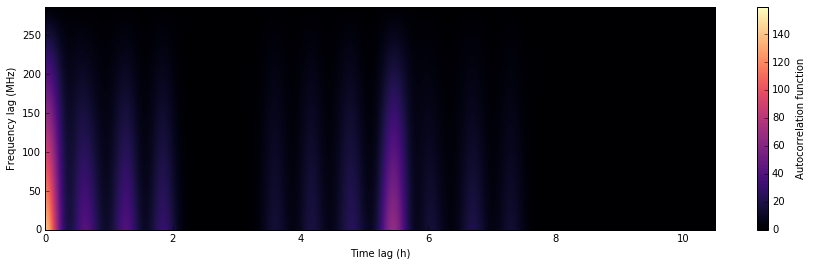

In [23]:
fig, ax = plt.subplots(1, 1, figsize = (15,4))

#get the start indices of the first quadrant (top right):
x_start = corr.shape[0]//2 
y_start = corr.shape[1]//2 

corr_quadrant = np.real(corr)[x_start:, y_start:]

corr_ds = plot_corr_ds(fig, ax, corr_quadrant, extent = [0, time[-1], 0, freq[-1]-freq[0]])

ax.set_xlabel('Time lag (h)')
ax.set_ylabel('Frequency lag (MHz)')

plt.show()

This two-dimensional plot is showing the correlation of the dynamic spectrum as a function of time lag and frequency lag. For this purpose we care about the time lag, and specifically we care most about the time lag corresponding to a frequency lag of 0.

The autocorrelation shows multiples ridges at different time lags. The strongest autocorrelation signal is at the origin (0 time and 0 frequency lag). However, there is also a second strong peak at a time lag of approximately 5.5 h.

#### Exercise 3.6
What does the strong peak at approximately 5.5 hours indicate?

*Write any written solutions by double-clicking on this cell.*

In the next plot, we plot the 2D autocorrelation and its 0-frequency lag component below:

/usr/physics/python/Canopy-1.7.2/Canopy_64bit/User/lib/python2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


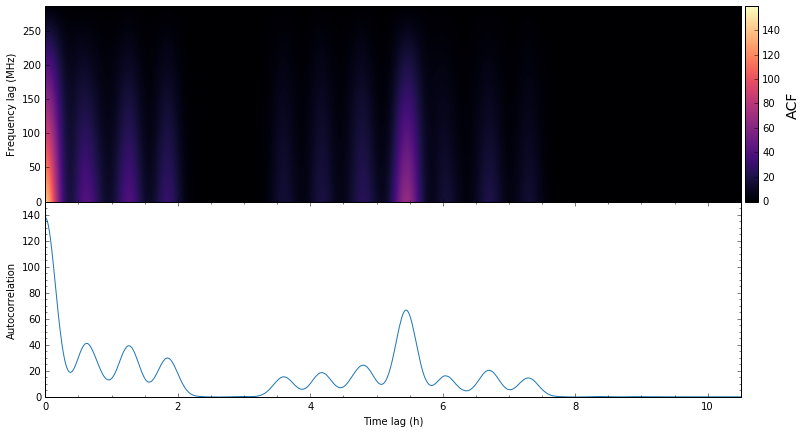

In [24]:
corr_0freqlag = corr[x_start:, y_start] #grab the zero frequency lag component of autocorrelation

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12,7), sharex = True)

corr_ds = plot_corr_ds(fig, ax1, corr_quadrant, extent = [0, time[-1], 0, freq[-1]-freq[0]], colorbar = False) #plot the autocorrelation without a colorbar

ax1.set_ylabel('Frequency lag (MHz)') #set the y label for the 2D plot

ax2.plot(time, corr_0freqlag) #plot the zero frequency lag ACF
ax2.set_xlim(0, time[-1]) #set the plot limits appropriately
ax2.set_ylim(0, 150)

ax2.set_xlabel('Time lag (h)')
ax2.set_ylabel('Autocorrelation')

fig.subplots_adjust(hspace = 0.0) #make the subplots joined together
plt.minorticks_on()

pos = ax1.get_position() #manually add a colorbar to be in the right position by creating a new pyplot axis
y0_cb = pos.y0
height_cb = pos.y1 - pos.y0
fig.subplots_adjust(right=0.93)
cbar_ax = fig.add_axes([0.935, y0_cb, 0.015, height_cb])

cbar = plt.colorbar(corr_ds, cax = cbar_ax)
cbar.set_label('ACF', fontsize = 14)

The zero-frequency lag component of the ACF gives a profile of the two-dimensional autocorrelation, and is a good way to find any periodicities in the data.

#### Exercise 3.7
Use the <a href = https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html>`find_peaks`</a> function from the scipy signal processing library to find the time lags of the peaks in the zero frequency-lag autocorrelation (`corr_0freqlag`), with a `distance` threshold of 50 indices between peaks, and a minimum `height` of 14.0. You should find 10 peaks in total.

In [ ]:
from scipy.signal import find_peaks

peak_indices, peak_properties = #complete this line using find_peaks

peak_times = time[peak_indices]
print(peak_times)

Let's redo the above plot, plotting lines where the peaks lie:

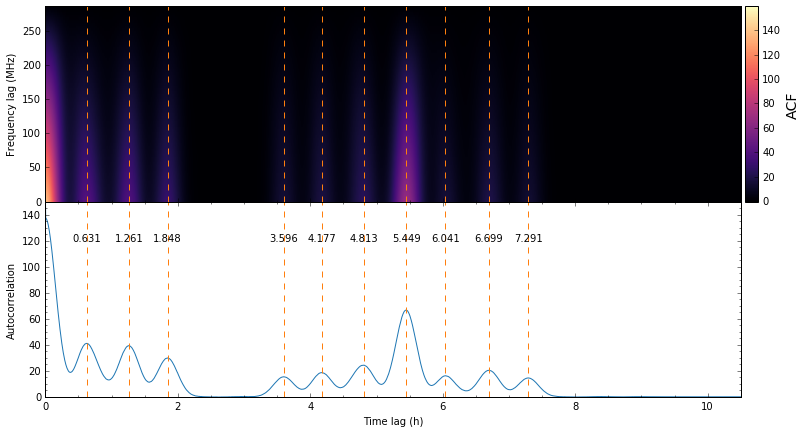

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12,7), sharex = True)

corr_ds = plot_corr_ds(fig, ax1, corr_quadrant, extent = [0, time[-1], 0, freq[-1]-freq[0]], colorbar = False) #plot the autocorrelation without a colorbar

ax1.set_ylabel('Frequency lag (MHz)') #set the y label for the 2D plot

ax2.plot(time, corr_0freqlag) #plot the zero frequency lag ACF
ax2.set_xlim(0, time[-1]) #set the plot limits appropriately
ax2.set_ylim(0, 150)

ax2.set_xlabel('Time lag (h)')
ax2.set_ylabel('Autocorrelation')

fig.subplots_adjust(hspace = 0.0) #make the subplots joined together
plt.minorticks_on()

pos = ax1.get_position() #manually add a colorbar to be in the right position by creating a new pyplot axis
y0_cb = pos.y0
height_cb = pos.y1 - pos.y0
fig.subplots_adjust(right=0.93)
cbar_ax = fig.add_axes([0.935, y0_cb, 0.015, height_cb])

cbar = plt.colorbar(corr_ds, cax = cbar_ax)
cbar.set_label('ACF', fontsize = 14)

for peak_time in peak_times:
    ax1.axvline(peak_time, c = new_colors[1], ls = '--')
    ax2.axvline(peak_time, c = new_colors[1], ls = '--')
    ax2.text(peak_time, 120, '{:.3f}'.format(peak_time), horizontalalignment = 'center')
    


So `find_peaks` has successfully found the peaks in the zero-frequency lag component of the 2D autocorrelation. We can now get a much more accurate estimate of the periodicity of the bursts: 5.449 hours, indicated by the time lag of the strongest peak.

This means that using long radio observations, we can measure the rotation period of UV Ceti, and perhaps of other rapidly rotating M-dwarf stars as well!

#### Exercise 3.8

What is the meaning of the nearly evenly-separated smaller peaks in the autocorrelation? Why do they arise, and what do they indicate?

You might also notice that the ridges in the 2D autocorrelation are not perfectly vertical, but slightly tilted. Why might this be?

*Write any written solutions by double-clicking on this cell.*

#### Extension

Repeat the above analysis, but by computing the autocorrelation of the 1-dimensional light-curve you computed in [Exercise 2.3](#Exercise-2.3). For this, you will need to use `scipy.signal.correlate` rather than `correlate2d`. Do you find the same period and features in the autocorrelation? Is one method better, and why? Note that the "true" period (the period set when I simulated these data) is 5.447 hours.

__Hint__: remember, the autocorrelation will give you information for positive and negative time lags. If you are just interested in the positive time lags, you will need to only use the right-half of the 1D autocorrelation.

In [27]:
from scipy.signal import correlate

In [ ]:
#your code here: